In [124]:
import torch
import matplotlib.pyplot as plt

In [125]:
i_max = 20
j_max = 20

I, J = torch.meshgrid(torch.arange(0, i_max + 1), torch.arange(-j_max, j_max + 1), indexing='ij')
I = I + 1e-10
J = J + 1e-10

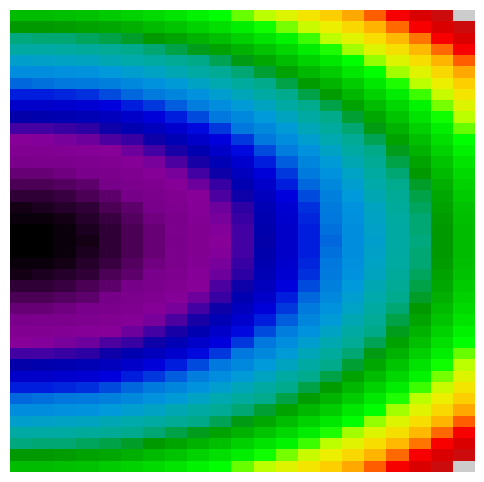

In [126]:
def potential(i, j):
    return (i**2 + j**2)

V = potential(I, J)

plt.figure(figsize=(6,6))
plt.pcolormesh(I, J, V, cmap='nipy_spectral')
plt.axis('off')
plt.show()

In [84]:
# The finite-differences lattice approximation to the linear operator for the first derivative w.r.t i
d_i = torch.zeros(2*[len(I.flatten())])
for k in range(len(d_i)):
    if k + 2*j_max + 1 < len(d_i):
        # Forward finite differences
        d_i[k + 2*j_max + 1, k] = 1
        d_i[k, k] = -1
    else:
        # Central finite differences
        d_i[k, k] = 1
        d_i[k - 2*j_max - 1, k] = -1


# The finite-differences lattice approximation to the linear operator for the second derivative w.r.t i 
dd_i = torch.zeros(2*[len(I.flatten())])
for k in range(len(dd_i)):
    if k + 2*j_max + 1 >= len(dd_i):
        # Backward finite differences
        dd_i[k, k] = 1
        dd_i[k - 2*j_max - 1, k] = -2
        dd_i[k - 4*j_max - 2, k] = 1
    elif k - 2*j_max - 1 < 0:
        # Forward finite differences
        dd_i[k, k] = 1
        dd_i[k + 2*j_max + 1, k] = -2
        dd_i[k + 4*j_max + 2, k] = 1
    else:
        # Central finite differences
        dd_i[k + 2*j_max + 1, k] = 1
        dd_i[k, k] = -2
        dd_i[k - 2*j_max - 1, k] = 1

# The finite-differences lattice approximation to the linear operator for the second derivative w.r.t j
dd_j = torch.zeros(2*[len(I.flatten())])
for k in range(len(dd_j)):
    # Backward finite differences
    if k % (2*j_max + 1) == 2*j_max:
        dd_j[k, k] = 1
        dd_j[k - 1, k] = -2
        dd_j[k - 2, k] = 1
    # Forward finite differences
    elif k % (2*j_max + 1) == 0:
        dd_j[k, k] = 1
        dd_j[k + 1, k] = -2
        dd_j[k + 2, k] = 1
    else:
        # Central finite differences
        dd_j[k + 1, k] = 1
        dd_j[k, k] = -2
        dd_j[k - 1, k] = 1

In [118]:
alpha = 0
delta_rho = 0.1
delta_z = 0.1

E_hat = V.flatten() + (alpha / (delta_rho * I.flatten()))**2.0 - (dd_i / delta_rho**2.0) - (dd_j / delta_z**2.0) - (d_i / (delta_rho**2.0 * I.flatten()))

In [119]:
E_hat = E_hat.to_sparse()
eigenvalues, eigenvectors = torch.lobpcg(E_hat, k=2, largest=False)

In [120]:
def get_e(n):
    return eigenvectors.T[n].reshape(I.shape)

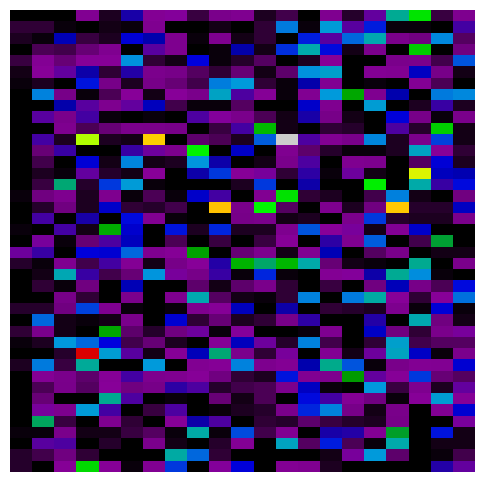

In [122]:
plt.figure(figsize=(6,6))
plt.pcolormesh(I, J, get_e(0)**2.0, cmap='nipy_spectral')
plt.axis('off')
plt.show()